# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("demo01_tratado.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   mau                                     16650 non-null  int64  
 2   possui_fone_comercial                   16650 non-null  int64  
 3   possui_fone                             16650 non-null  int64  
 4   possui_email                            16650 non-null  int64  
 5   sexo                                    16650 non-null  int64  
 6   posse_de_veiculo                        16650 non-null  int64  
 7   posse_de_imovel                         16650 non-null  int64  
 8   idade                                   16650 non-null  float64
 9   tempo_emprego                           16650 non-null  float64
 10  qtd_filhos_0                            16650 non-null  in

In [3]:
df.head()

,Unnamed: 0,mau,possui_fone_comercial,possui_fone,possui_email,sexo,posse_de_veiculo,posse_de_imovel,idade,tempo_emprego,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,0,0,0,0,1,1,58.832877,3.106849,...,1,0,0,0,0,1,0,0,0,0
1,1,0,0,1,1,1,0,1,52.356164,8.358904,...,0,0,1,0,0,1,0,0,0,0
2,2,0,0,1,1,1,0,1,52.356164,8.358904,...,0,0,1,0,0,1,0,0,0,0
3,3,0,1,1,1,0,1,1,46.224658,2.106849,...,1,0,0,0,0,1,0,0,0,0
4,4,0,0,0,0,1,1,0,29.230137,3.021918,...,1,0,0,0,0,1,0,0,0,0


In [4]:
# dropo a primeira coluna (index que ficou duplicado)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,mau,possui_fone_comercial,possui_fone,possui_email,sexo,posse_de_veiculo,posse_de_imovel,idade,tempo_emprego,qtd_filhos_0,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,0,0,0,1,1,58.832877,3.106849,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,1,1,1,0,1,52.356164,8.358904,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,1,1,0,1,52.356164,8.358904,1,...,0,0,1,0,0,1,0,0,0,0
3,0,1,1,1,0,1,1,46.224658,2.106849,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,0,29.230137,3.021918,1,...,1,0,0,0,0,1,0,0,0,0


In [5]:
# divido entre variavel resposta X explicativas
var_resposta = df['mau']
vars_explicativa = df.drop('mau', axis=1)

In [6]:
# separo a base pra treinamento X teste

x_treino, x_teste, y_treino, y_teste = train_test_split(vars_explicativa, var_resposta, test_size=0.3)

print(x_treino.shape)
print(y_treino.shape)

print(x_teste.shape)
print(y_teste.shape)

(11655, 46)
(11655,)
(4995, 46)
(4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [7]:
#1 - Defina um objeto com a função da árvore de decisão vista em aula.

clf = DecisionTreeClassifier()

In [8]:
#2 - Treine o modelo com os dados que você separou para treinamento.

modelo = clf.fit(x_treino, y_treino)

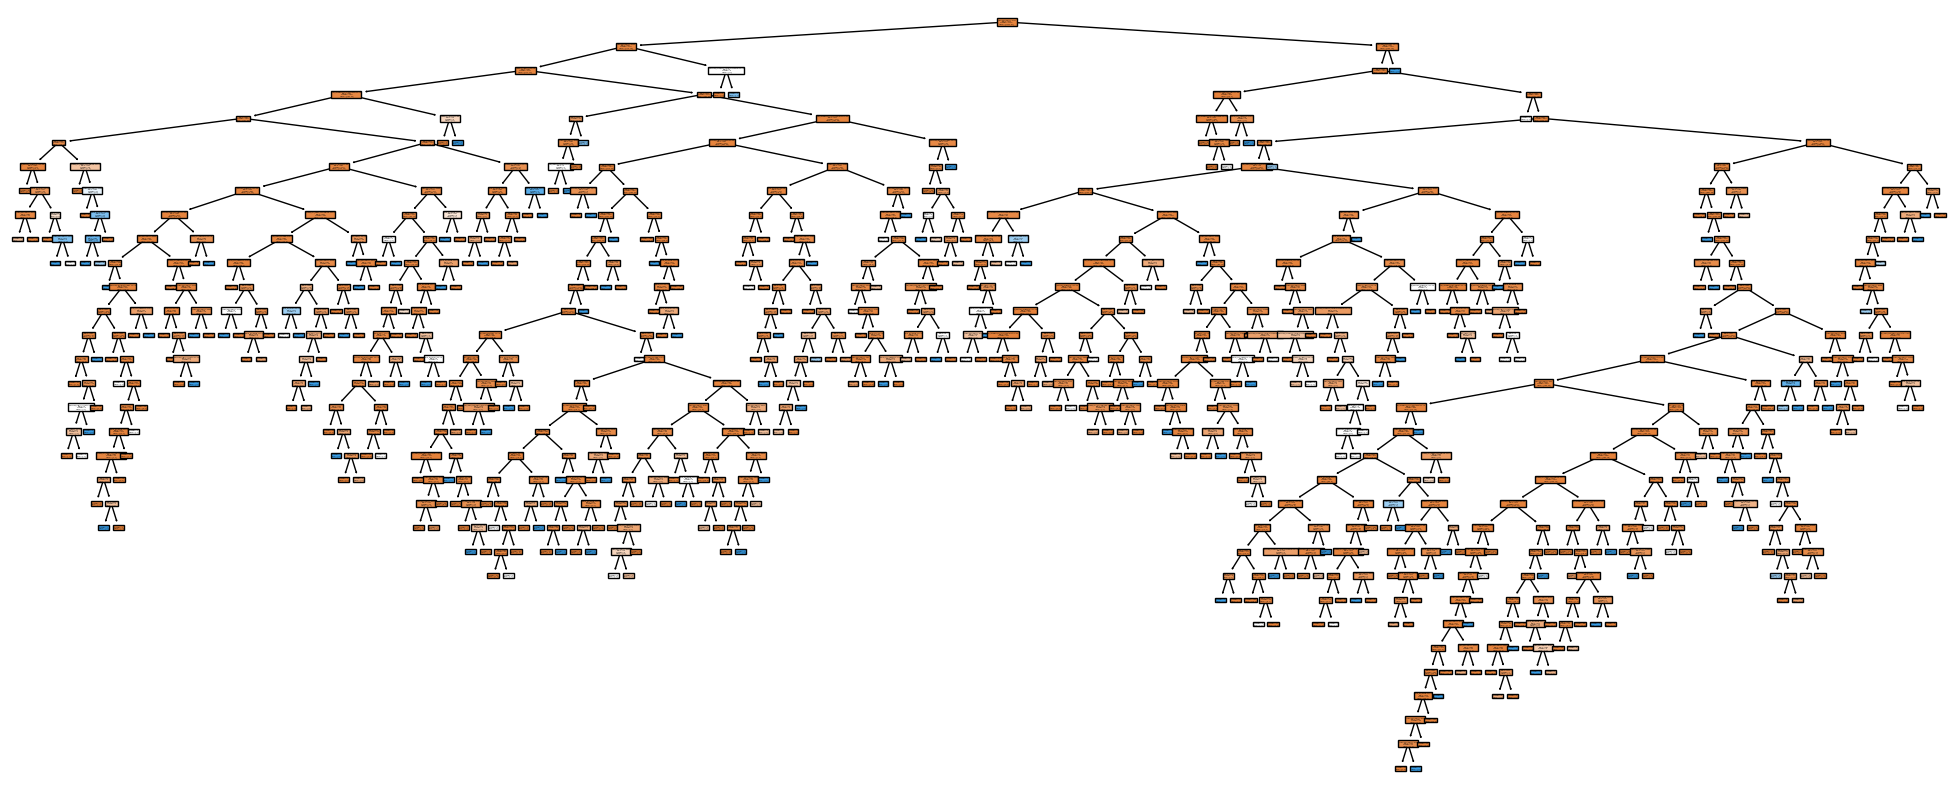

In [9]:
#3 - Visualize a árvore. Talvez você queira aumentar um pouco a figura.

plt.close('all')

plt.figure(figsize = (25, 10))

plot_tree(modelo, filled = True, feature_names = x_treino.columns)

plt.show()

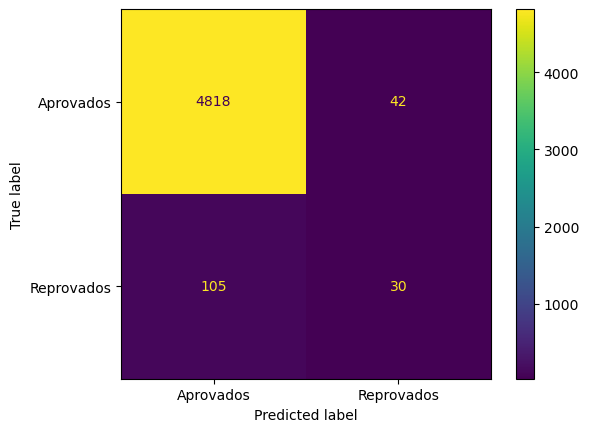

In [10]:
#4 - Produza uma visualização da matriz de classificação

plt.close('all')

# testo o modelo com a massa do teste
previsao = modelo.predict(x_teste)

# crio a matriz de confusão
cm = confusion_matrix(y_teste, previsao)

ConfusionMatrixDisplay( confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'] ).plot()


plt.show()


In [11]:
#5 - Calcule a acurácia na base de treinamento

# calculo a acuracia com os dados de treino
acuraria_treinamento = modelo.score(x_treino, y_treino)
                             
print(f'Acuracia com dados de treino = {acuraria_treinamento}')


Acuracia com dados de treino = 0.990990990990991


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [12]:
#1 - Classifique a base de teste de acordo com a árvore que você treinou no item 2.

# testo o modelo na base de teste
previsao = modelo.predict(x_teste)

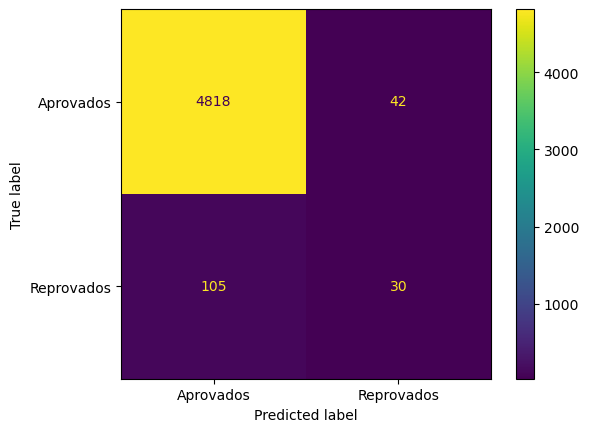

In [13]:
#2 - Produza a visualização da matriz de confusão para a base de teste.

plt.close('all')

# crio a matriz de confusao
cm = confusion_matrix(y_true = y_teste, y_pred = previsao)

ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Aprovados', 'Reprovados']).plot()

plt.show()

In [14]:
#3 - Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

# calculo a acuracia com os dados de treino
acuraria_treinamento = modelo.score(x_treino, y_treino)
                             
# calculo a acuracia com os dados de teste
acuraria_teste = modelo.score(x_teste, y_teste)


print(f'Acuracia com dados de treino = {acuraria_treinamento}')
print(f'Acuracia com dados de teste  = {acuraria_teste}')

Acuracia com dados de treino = 0.990990990990991
Acuracia com dados de teste  = 0.9705705705705706


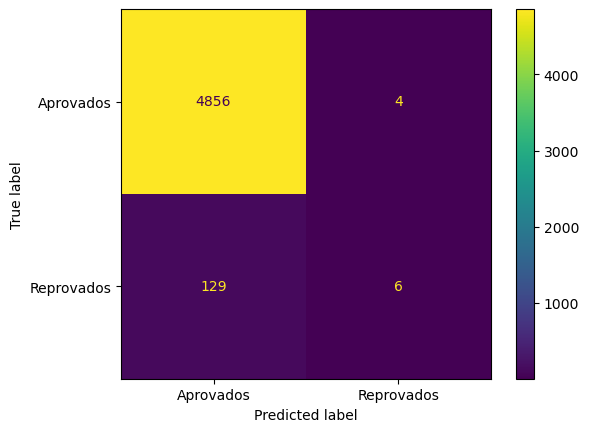

Proporcao classificados como maus = 0.026626626626626626


In [15]:
#4 - Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. 
#    Use o random_state = 123. 
#    Avalie a matriz de classificação. Observe a distribuição da predição - 
#    qual a proporção de proponentes foram classificados como 'maus'?

plt.close('all')

# crio a arvore
clf = DecisionTreeClassifier(random_state=123, min_samples_leaf=5, max_depth=10)


# treino o modelo
modelo = clf.fit(x_treino, y_treino)

# testo o modelo
previsao = modelo.predict(x_teste)


# gero a matriz de conf.
cm = confusion_matrix(y_teste, previsao)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Aprovados', 'Reprovados']).plot()

plt.show()



print(f'Proporcao classificados como maus = { (1 - modelo.score(x_teste, y_teste)) }')


In [16]:
#5 - Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

acertos = 4854 + 17
total = y_teste.shape[0]

print(f'Acuracia caso o modelo classificasse todos como "bons": { acertos / total }')


Acuracia caso o modelo classificasse todos como "bons": 0.9751751751751752
